# COMPLEMENT NAIVE BAYES ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
del df['UDI']
del df['Product ID']
del df['Target']

In [4]:
df=df.dropna()

In [5]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type'],
      dtype='object')

In [6]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


In [7]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Type']=lab.fit_transform(df['Type'])

In [8]:
df['Type'].dtype

dtype('int32')

In [9]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,298.1,308.6,1551,42.8,0,No Failure
1,1,298.2,308.7,1408,46.3,3,No Failure
2,1,298.1,308.5,1498,49.4,5,No Failure
3,1,298.2,308.6,1433,39.5,7,No Failure
4,1,298.2,308.7,1408,40.0,9,No Failure


In [10]:
x1 = df.drop(labels='Failure Type', axis=1)
y1 = df.loc[:,'Failure Type']

In [11]:
x1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14
9996,0,298.9,308.4,1632,31.8,17
9997,2,299.0,308.6,1645,33.4,22
9998,0,299.0,308.7,1408,48.5,25


In [12]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({'No Failure': 9652, 'Heat Dissipation Failure': 112, 'Power Failure': 95, 'Overstrain Failure': 78, 'Tool Wear Failure': 45, 'Random Failures': 18})
OVER SAMPLING DATA COUNT  :  Counter({'No Failure': 9652, 'Power Failure': 9652, 'Tool Wear Failure': 9652, 'Overstrain Failure': 9652, 'Random Failures': 9652, 'Heat Dissipation Failure': 9652})


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  46329
NUMBER OF TEST DATASET      :  11583
TOTAL NUMBER OF DATASET    :  57912


In [14]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  46329
NUMBER OF TEST DATASET      :  11583
TOTAL NUMBER OF DATASET    :  57912


In [15]:
from sklearn.naive_bayes import ComplementNB

In [16]:
CNB = ComplementNB()
CNB.fit(x_train,y_train)

ComplementNB()

In [17]:
predicted = CNB.predict(x_test)

In [18]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF COMPLEMENTNB:\n\n',cr)

THE CLASSIFICATION REPORT OF COMPLEMENTNB:

                           precision    recall  f1-score   support

Heat Dissipation Failure       0.52      0.33      0.40      1930
              No Failure       0.00      0.00      0.00      1930
      Overstrain Failure       0.40      1.00      0.57      1931
           Power Failure       0.27      0.49      0.35      1931
         Random Failures       0.00      0.00      0.00      1931
       Tool Wear Failure       0.53      0.55      0.54      1930

                accuracy                           0.39     11583
               macro avg       0.29      0.39      0.31     11583
            weighted avg       0.29      0.39      0.31     11583



In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF COMPLEMENTNB:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF COMPLEMENTNB:


 [[ 637    0  718  575    0    0]
 [ 109    0  332 1191    0  298]
 [   0    0 1931    0    0    0]
 [ 476    0  512  943    0    0]
 [   0    0  529  750    0  652]
 [   0    0  832   43    0 1055]]


In [20]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(CNB, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [39.39393939 40.36950704 39.94128821 39.328268   39.97582456]


In [21]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF COMPLEMENTNB IS :",a*100)

THE ACCURACY SCORE OF COMPLEMENTNB IS : 39.41983941983942


In [22]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF COMPLEMENTNB IS :",hl*100)

THE HAMMING LOSS OF COMPLEMENTNB IS : 60.58016058016058


THE CONFUSION MATRIX SCORE OF COMPLEMENTNB:


[[ 637    0  718  575    0    0]
 [ 109    0  332 1191    0  298]
 [   0    0 1931    0    0    0]
 [ 476    0  512  943    0    0]
 [   0    0  529  750    0  652]
 [   0    0  832   43    0 1055]]


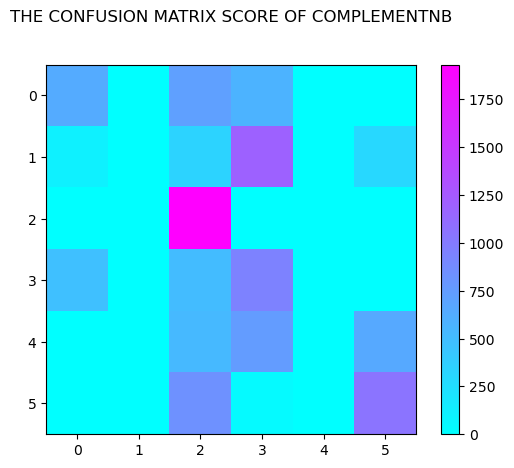

In [23]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF COMPLEMENTNB\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF COMPLEMENTNB:\n\n')
print(cm)
plot_confusion_matrix(cm)

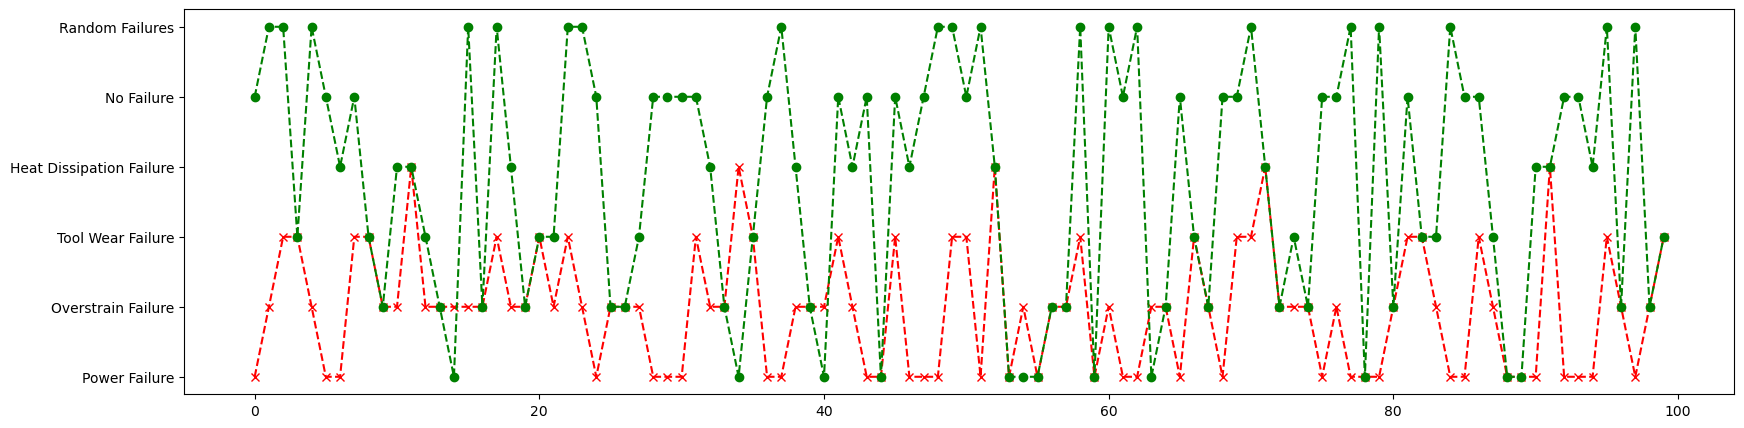

In [24]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()